In [1]:
%matplotlib inline
from IPython.core. pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rc('font', family='AppleGothic')

## 1.2 베이지안 프레임워크

- 사전 확률(prior probability) : 어떤 사건에 대한 사전의 믿음  
- 사후 확률(posterior probability) : 증거를 관측한 후 반영되어 업데이트된 믿음  
- 가능도(우도, likelihood) : 관찰된 증거로 부터 특정 모수가 맞을 가능성

베이즈 정리 :  
$${P(A|X) = P(X|A)P(A)\over P(X)} \propto P(X|A)P(A)$$

### 1.2.1 예제 : 동전 던지기

- 동전 던지기에서 앞면이 나올 확률을 확신하지 못한다고 가정
- 실제 앞면이 나올 확률 : p
- p에 대한 사전적인 견해는 없다.
- 관측데이터 : 동전을 던지고, 앞면이나 뒷면의 관측 결과를 기록

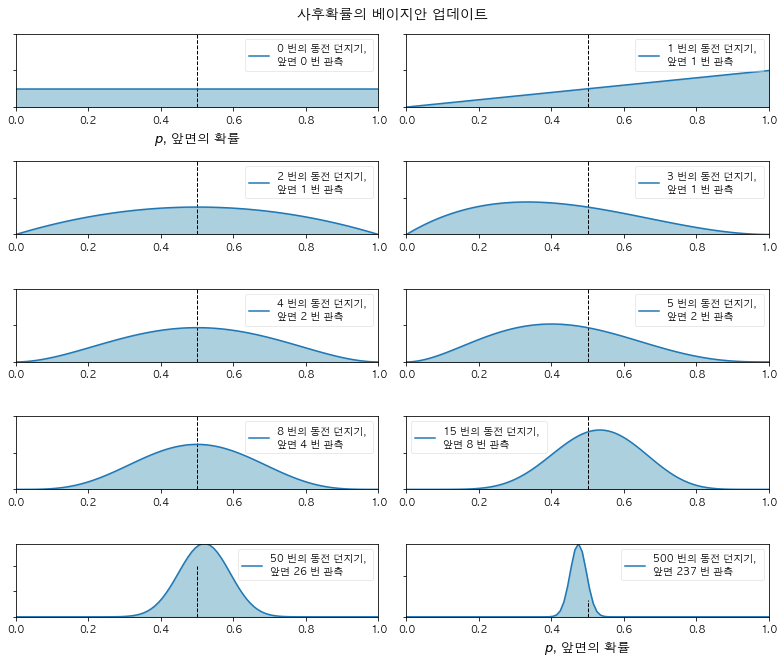

In [2]:
# 동전 던지기를 관측하면서 점차 업데이트된 사후확률의 결과
figsize(11,9)

import scipy.stats as stats

dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials) / 2, 2, k + 1)
    plt.xlabel("$p$, 앞면의 확률", fontsize=13) \
    if k in [0, len(n_trials) - 1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="%d 번의 동전 던지기, \n앞면 %d 번 관측" % (N, heads))
    plt.fill_between(x, 0, y, color="#348AB0", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyle="--", lw=1)
    
    
    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)
    
plt.suptitle("사후확률의 베이지안 업데이트", y=1.02, fontsize=14)
plt.tight_layout()

베르누이의 켤레 사전 분포 : 베타 분포 ([link](https://ko.wikipedia.org/wiki/%EB%B2%A0%ED%83%80_%EB%B6%84%ED%8F%AC))  
앞면일 경우 $\alpha$ 가 앞면이 나온 횟수만큼 증가  
뒷면일 경우 $\beta$ 가 앞면이 나온 횟수만큼 증가

### 1.2.2 예제 : 사서일까, 농부일까?

- 스티브는 수줍음이 많고 남을 잘 도와주는 사람이지만, 타인에게는 별로 관심이 없다.
- 물건이 제 자리에 정리되어 있는 걸 좋아하고, 자신의 일에 매우 꼼꼼


    => 이 경우 스티브는 사서인가? 농부인가?


- 사전정보 : 남자 농부와 남자 사서의 비율은 20:1


P(A) : 스티브가 사서일 확률, 1/21 = 0.047  
X : 이웃에게서 얻은 스티브에 대한 정보  
P(A|X) : 정보가 주어졌을 때 스티브가 사서일 확률  
P(X|A) : 스티브가 사서라는 전제 하에 이웃이 스티브를 설명할 확률, 아마 거의 1.0에 가깝다고 가정하고 0.95로 설정  
P(X) : 이웃이 스티브를 설명한 대로 진술한 가능성  
    => 추정하기 어렵기에 가정 : P(X|A)P(A) + P(X|~A)P(~A), 0.52라고 가정  
P(A|X) = ${0.951/32 \over 0.52} = 0.087$

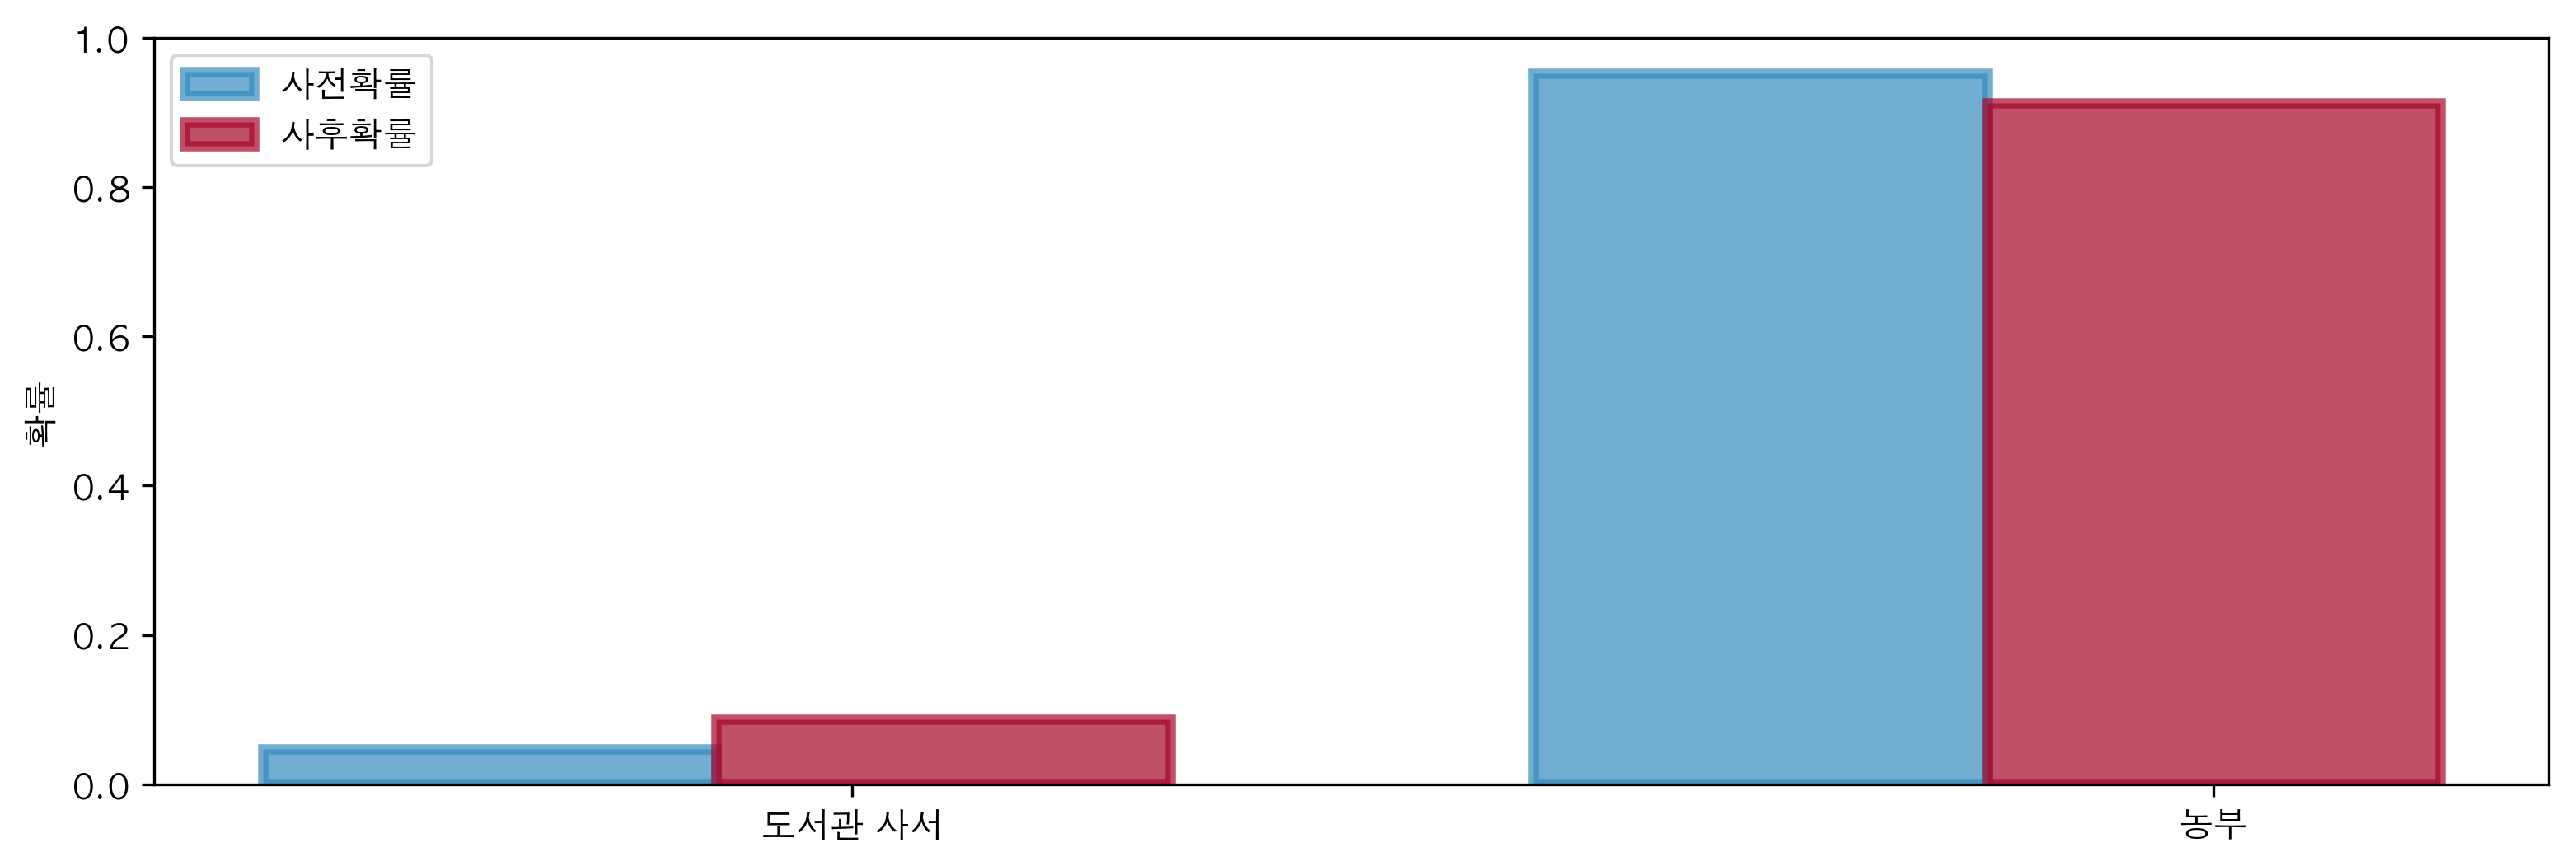

In [3]:
### 스티브의 직업에 대한 사전확률과 사후확률
figsize(12.5, 4)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
colors = ["#348ABD", "#A60628"]
prior = [1/21., 20/21.]
posterior = [0.087,1-0.087]
plt.bar([0, .7], prior, alpha=0.70, width=0.25,
color=colors[0], label="사전확률",
lw="3", edgecolor="#348ABD")
plt.bar([0+0.25, .7+0.25], posterior, alpha=0.7,
width=0.25, color=colors[1],
label="사후확률",
lw="3", edgecolor="#A60628")
plt.xticks([0.20, 0.95], ["도서관 사서", "농부"])
#plt.title("스티브 직업에 대한 사전과 사후확률분포")
plt.ylabel("확률")
plt.legend(loc="upper left");

위 식에서 X라는 증거를 봄으로써 사서일 확률이 높아졌다.